<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_de_Jacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = red>Metodo de Jacobi.
## <font color = purple> Tecnica interativa de Jacobi

Para resolver $A$$x$ = b dada una aproximacion inicial $x^{(0)}$:

## <font color = green> Entrada:
el numero de ecuaciones y valores desconocidos $n$; $a_{ij}$, $1\leq i \leq n$ de la matriz $A$; las entradas $b_i$, $1\leq i \leq n$ de $\textbf{b}$; las entradas $X$$O_i$, $1\leq i \leq n$ de $\textbf{XO = $x^{(0)}$}$; tolerancia $\textbf{TOL}$; numero maximo de interaciones $N$.

## <font color = green> Salida:
la solucion aproximada $x_1,.....,x_n$ o un mensaje que indica que se excedio el numero de interciones.

Paso 1: Determine  $k$ = 1.

Paso 2: Mientras ($k \leq N $) haga los pasos 3-6

Paso 3: Para $i = 1,.....,n$

 determine $ x_i  = \frac{1}{a_{ij}} \cdot [- \sum_{j = 1,j\neq1 }^n (a_ {ij}\textbf{ X$O_j$}) + b_i ]$

Paso 4: Si $ || \textbf{x - XO} || < \textbf{TOL}$ entonces Salida ($x_1,....,_n$)

Paso 5: Determine $k = k+1$

Paso 6: Para $i=1,...,n$ determine $\textbf{X$O_i$} = x_i$.

Paso 7: Salida ('numero maximo de interacione excedido'):
                (El procedimoento no fue exitoso.)
                PARE.
        
    


In [6]:
import numpy as np  # libreria numpy: Para operaciones matriciales y matemáticas.
import pandas as pd # libreria pandas: Para crear y mostrar tablas con los resultados.

def jacobi(A, b, X0, TOL, N):

    n = len(b)      # Obtener la dimensión del sistema
    x = np.zeros(n) # Inicializar el vector para la nueva aproximació
    k = 1           # Inicia contador de iteraciones
    resultados = [] # Lista para almacenar los resultados de cada iteración (para la tabla final)

    # Bucle principal de iteraciones
    while k <= N:
        for i in range(n): # Calcular cada componente del nuevo vector solución
            suma = 0       # Inicia la suma de los términos no diagonales
            for j in range(n): # Calcular la suma de a_ij * x_j para j ≠ i
                if j != i:     # Excluir el elemento diagonal
                    suma += A[i, j] * X0[j]
            x[i] = (b[i] - suma) / A[i, i] # Calcular el nuevo valor para x_i usando la fórmula de Jacobi

        diferencia = np.linalg.norm(x - X0, np.inf) # Calcular el error, por la norma infinita de la diferencia entre la aproximación actual y la anterior

        resultados.append([k] + list(x.copy()) + [diferencia]) # Almacenar los resultados de esta iteración para la tabla final

        # Verificar criterio de convergencia
        if diferencia < TOL:
            columnas = ['Iteración'] + [f'x{i+1}' for i in range(n)] + ['Error'] # Las columnas son: Iteración, x1, x2, ..., xn, Error
            df = pd.DataFrame(resultados, columns=columnas)                      # Crear y mostrar tabla con los resultados de todas las iteraciones
            print(df.to_string(index=False))                                     # Mostrar la tabla sin índices
            return x                                                             # Retornar la solución aproximada

        # Contador de iteraciones
        k += 1
        X0 = x.copy()

    columnas = ['Iteración'] + [f'x{i+1}' for i in range(n)] + ['Error']               # Si se excede el número máximo de iteraciones sin converger
    df = pd.DataFrame(resultados, columns=columnas)                                    # Crear y mostrar tabla con los resultados de todas las iteraciones
    print(df.to_string(index=False))                                                   # Mostrar la tabla sin índices
    print("\nNúmero máximo de iteraciones excedido. El procedimiento no fue exitoso.") # Mensaje de no convergencia
    return None                                                                        # Retornar None para indicar que no se alcanzó la convergencia

# Ejemplo de uso del método de Jacobi, con el ejercicio visto en clase
if __name__ == "__main__":
    A = np.array([[4,-1,-1,0],            # Matriz de coeficientes
            [-1,4,0,-1],
            [-1,0,4,-1],
            [0,-1,-1,4]])

    b = np.array([0, 2/3, 8/9, 14/9])                # Vector de términos independientes
    X0 = np.array([7/27, 7/27, 7/27, 7/27])          # Aproximación inicial
    TOL = 1e-5                                       # Tolerancia para el criterio de convergencia "ERROR"
    N = 100                                          # Número máximo de iteraciones permitidas

    # Llamar a la función jacobi para resolver el sistema
    print("Resolviendo el sistema usando el método de Jacobi:")
    print("Sistema de ecuaciones:")
    print("         4X1 - X2 - X3       = 0")
    print("         -X1 + 4X2      - X4 = 2/3")
    print("         -X1      + 4X3 - X4 = 8/9")
    print("             - X2 - X3 - 4X4 = 14/9")
    print(f"Aproximación inicial: {X0}")
    print(f"Tolerancia: {TOL}")
    print(f"Máximo de iteraciones: {N}")
    print("\nProgreso de las iteraciones:")

    solucion = jacobi(A, b, X0, TOL, N)

    # Mostrar la solución si se encontró
    if solucion is not None:
        print(f"\nSolución aproximada: X1 = {solucion[0]:.6f}, x2 = {solucion[1]:.6f}, X3 = {solucion[2]:.6f}, x4 = {solucion[3]:.6f}")

        # Verificar la solución calculando A*x y comparando con b
        print("\nVerificación:")
        print(f"A * x = {np.dot(A, solucion)}")
        print(f"b     = {b}")



Resolviendo el sistema usando el método de Jacobi:
Sistema de ecuaciones:
         4X1 - X2 - X3       = 0
         -X1 + 4X2      - X4 = 2/3
         -X1      + 4X3 - X4 = 8/9
             - X2 - X3 - 4X4 = 14/9
Aproximación inicial: [0.25925926 0.25925926 0.25925926 0.25925926]
Tolerancia: 1e-05
Máximo de iteraciones: 100

Progreso de las iteraciones:
 Iteración       x1       x2       x3       x4    Error
         1 0.129630 0.296296 0.351852 0.518519 0.259259
         2 0.162037 0.328704 0.384259 0.550926 0.032407
         3 0.178241 0.344907 0.400463 0.567130 0.016204
         4 0.186343 0.353009 0.408565 0.575231 0.008102
         5 0.190394 0.357060 0.412616 0.579282 0.004051
         6 0.192419 0.359086 0.414641 0.581308 0.002025
         7 0.193432 0.360098 0.415654 0.582321 0.001013
         8 0.193938 0.360605 0.416160 0.582827 0.000506
         9 0.194191 0.360858 0.416413 0.583080 0.000253
        10 0.194318 0.360985 0.416540 0.583207 0.000127
        11 0.194381 0.361048

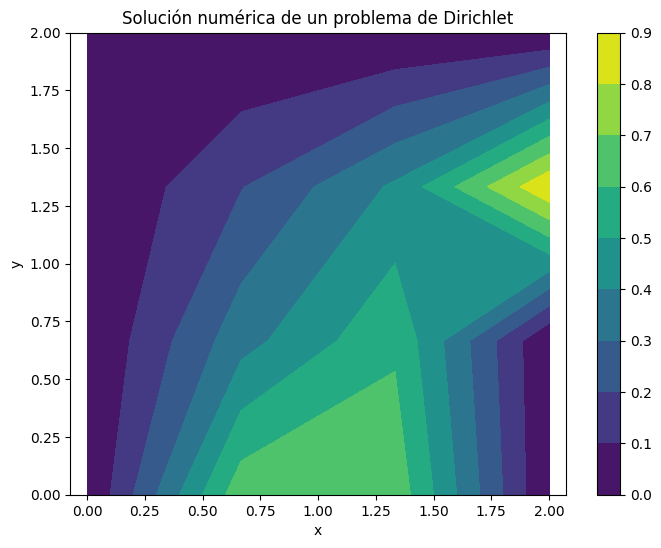

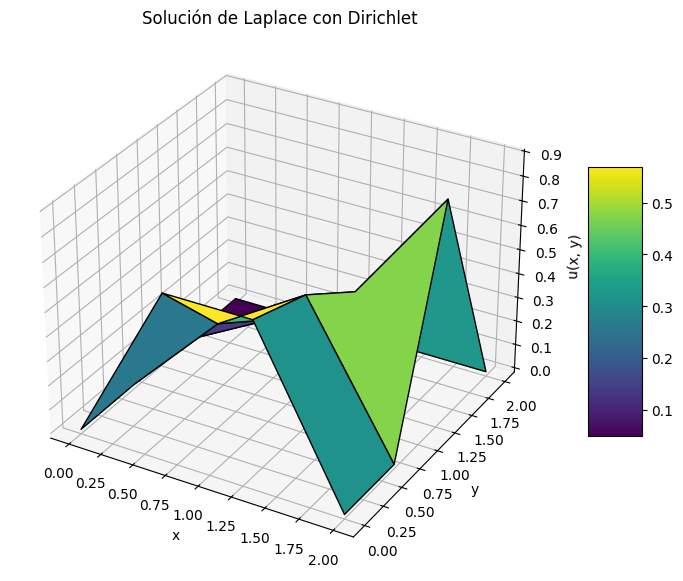

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

U=np.array([[0,2/3,2/3,0],
            [0,0.361103,0.583325,0],
            [0,0.194437,0.416659,8/9],
            [0,0,0,0]])

x = np.linspace(0, 2, 4)
y = np.linspace(0, 2, 4)
X, Y = np.meshgrid(x, y)

# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=10, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()